# Week 04 Logistic Regression Lab



- Course: Z604 Music Data Mining 
- Instructor: Kahyun Choi 

Download data files of the week from GitHub

- Deezer MSD Mood Dataset I with three one dimensional features (`moodmsdfeatures.csv`): https://drive.google.com/open?id=1CHuOsBQbVCNKHu049P2u-vvd5FwRyAVs

In [1]:
# if you meet "fatal: destination path 'W04' already exists and is not an empty directory" error, uncomment the line below and run again
# !rm -fr W04/
!git clone https://github.com/music-data-mining/W04.git

fatal: destination path 'W03' already exists and is not an empty directory.


In [2]:
# go to the directory of the week
%cd W04

/content/W03


In [3]:
# Common imports
import os
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Logistic regression

# Univariate Logistic Regression

## Sample Dataset 1: 
- X = np.array([[1],[2],[4],[3],[5]])
- y = np.array([[0],[0],[1],[1],[1]])

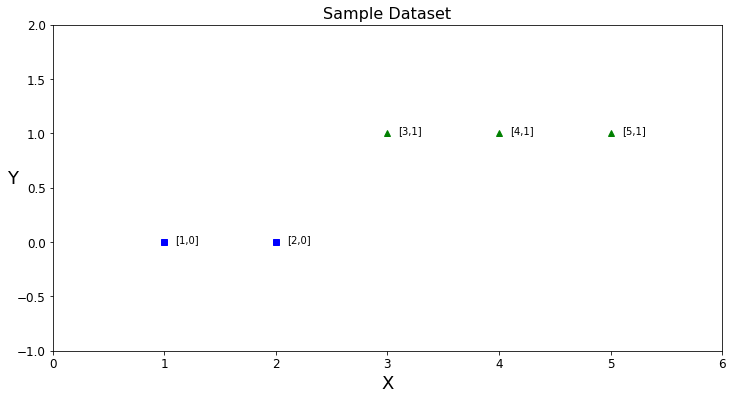

In [4]:
X = np.array([[1],[2],[4],[3],[5]])
y = np.array([[0],[0],[1],[1],[1]])
y = y.reshape(-1)

plt.figure(figsize=(12,6))
plt.plot(X[:2], y[:2], "bs", X[2:], y[2:], "g^")
plt.xlabel("X", fontsize=18)
plt.ylabel("Y", rotation=0, fontsize=18)
plt.axis([0, 6, -1, 2])
plt.title("Sample Dataset", fontsize=16)

plt.text(1+0.1,0,"[1,0]")
plt.text(2+0.1,0,"[2,0]")
plt.text(3+0.1,1,"[3,1]")
plt.text(4+0.1,1,"[4,1]")
plt.text(5+0.1,1,"[5,1]")

plt.show()

## Linear Regression

The linear model is: y = -0.3 + 0.3*X


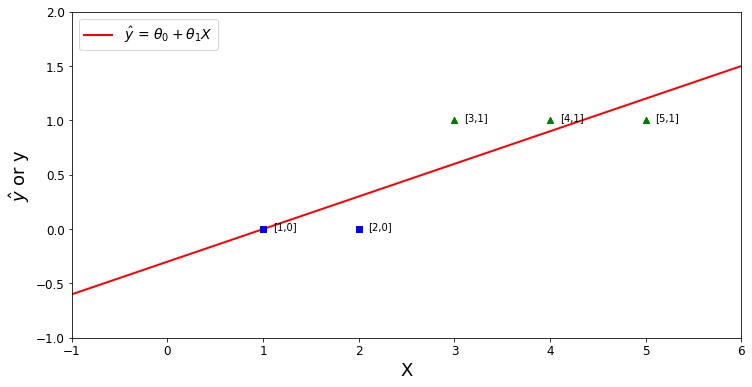

In [5]:
X = np.array([[1],[2],[4],[3],[5]])
y = np.array([[0],[0],[1],[1],[1]])

plt.figure(figsize=(12,6))
plt.plot(X[:2], y[:2], "bs", X[2:], y[2:], "g^")
plt.xlabel("X", fontsize=18)
plt.ylabel("Y", rotation=0, fontsize=18)
plt.axis([0, 6, -1, 2])

plt.text(1+0.1,0,"[1,0]")
plt.text(2+0.1,0,"[2,0]")
plt.text(3+0.1,1,"[3,1]")
plt.text(4+0.1,1,"[4,1]")
plt.text(5+0.1,1,"[5,1]")

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("The linear model is: y = {:.5} + {:.5}*X".format(lin_reg.intercept_[0], lin_reg.coef_[0][0]))

X_new = np.array([[-1], [6]])
y_predict = lin_reg.predict(X_new)
plt.plot(X_new, y_predict, "r-", linewidth=2, label="$\hat{y}$ = $\\theta_{0}+\\theta_{1} X}$")
plt.plot(X[:2], y[:2], "bs", X[2:], y[2:], "g^")
plt.xlabel("X", fontsize=18)
plt.ylabel("$\hat{y}$ or y", rotation=90, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-1, 6, -1, 2])
plt.show()

## Logistic Regression

In [6]:
X = np.array([[1],[2],[4],[3],[5]])
y = np.array([[0],[0],[1],[1],[1]]).reshape(-1)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [7]:
print("The linear model is: t = {:.5} + {:.5}*X".format(log_reg.intercept_[0], log_reg.coef_[0][0]))
print("-theta0/theta1: {0:0.1f}".format(-1*log_reg.intercept_[0]/log_reg.coef_[0][0]))

The linear model is: t = -2.5338 + 1.047*X
-theta0/theta1: 2.4


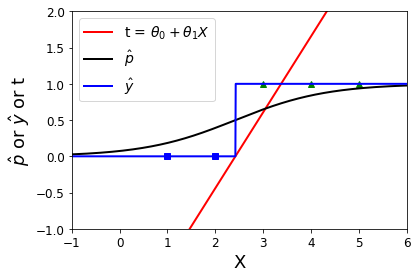

In [8]:
X_new = np.linspace(-1, 6, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)


plt.plot(X[:2], y[:2], "bs", X[2:], y[2:], "g^")

X_new = np.linspace(-1, 6, 1000).reshape(-1, 1)
t_predict = log_reg.coef_[0][0]*X_new + log_reg.intercept_[0]
plt.plot(X_new, t_predict, "r-", linewidth=2, label="t = $\\theta_{0}+\\theta_{1} X}$")

plt.plot(X_new, y_proba[:,1], "k-", linewidth=2, label="$\hat{p}$")

y_predict = log_reg.predict(X_new)
plt.plot(X_new, y_predict, "b-", linewidth=2, label="$\hat{y}$")
plt.xlabel("X", fontsize=18)
#plt.ylabel("$\hat{p}$ or $\hat{y}$ or t", rotation=90, fontsize=18)
plt.ylabel("$\hat{p}$ or $\hat{y}$ or t", rotation=90, fontsize=18)

plt.axis([-1, 6, -1, 2])
plt.legend(loc="upper left", fontsize=14)

plt.show()

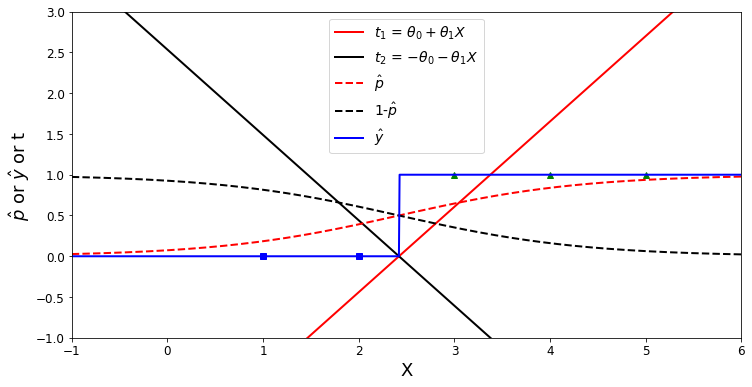

In [9]:
X_new = np.linspace(-1, 6, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(12,6))
plt.plot(X[:2], y[:2], "bs", X[2:], y[2:], "g^")

X_new = np.linspace(-1, 6, 1000).reshape(-1, 1)
t_predict1 = log_reg.coef_[0][0]*X_new + log_reg.intercept_[0]
plt.plot(X_new, t_predict1, "r-", linewidth=2, label="$t_1$ = $\\theta_{0}+\\theta_{1} X}$")
t_predict0 = -1*log_reg.coef_[0][0]*X_new - log_reg.intercept_[0]
plt.plot(X_new, t_predict0, "k-", linewidth=2, label="$t_2$ = $-\\theta_{0}-\\theta_{1} X}$")


plt.plot(X_new, y_proba[:,1], "r--", linewidth=2, label="$\hat{p}$")
plt.plot(X_new, y_proba[:,0], "k--", linewidth=2, label="1-$\hat{p}$")


y_predict = log_reg.predict(X_new)
plt.plot(X_new, y_predict, "b-", linewidth=2, label="$\hat{y}$")
plt.xlabel("X", fontsize=18)
#plt.ylabel("$\hat{p}$ or $\hat{y}$ or t", rotation=90, fontsize=18)
plt.ylabel("$\hat{p}$ or $\hat{y}$ or t", rotation=90, fontsize=18)

plt.axis([-1, 6, -1, 3])
plt.legend(loc="upper center", fontsize=14)

plt.show()

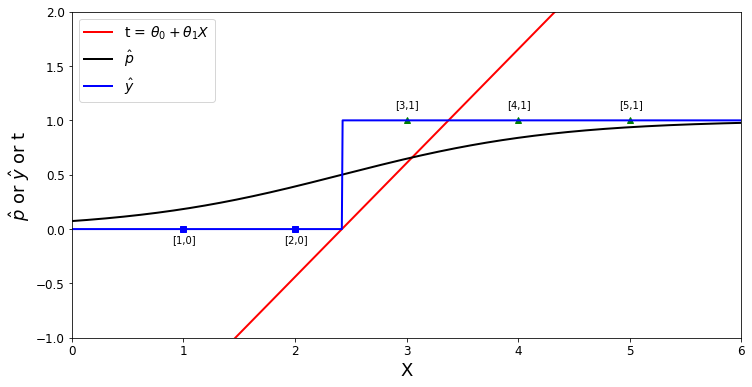

In [10]:
X = np.array([[1],[2],[4],[3],[5]])
y = np.array([[0],[0],[1],[1],[1]])

plt.figure(figsize=(12,6))
plt.plot(X[:2], y[:2], "bs", X[2:], y[2:], "g^")

plt.plot(X_new, t_predict, "r-", linewidth=2, label="t = $\\theta_{0}+\\theta_{1} X}$")
plt.plot(X_new, y_proba[:,1], "k-", linewidth=2, label="$\hat{p}$")
plt.plot(X_new, y_predict, "b-", linewidth=2, label="$\hat{y}$")

plt.xlabel("X", fontsize=18)
#plt.ylabel("$\hat{p}$ or $\hat{y}$ or t", rotation=90, fontsize=18)
plt.ylabel("$\hat{p}$ or $\hat{y}$ or t", rotation=90, fontsize=18)
plt.axis([0, 6, -1, 2])

plt.text(1-0.1,0-0.12,"[1,0]")
plt.text(2-0.1,0-0.12,"[2,0]")
plt.text(3-0.1,1+0.12,"[3,1]")
plt.text(4-0.1,1+0.12,"[4,1]")
plt.text(5-0.1,1+0.12,"[5,1]")

plt.legend(loc="upper left", fontsize=14)
plt.show()

In [11]:
y_proba

array([[0.97289949, 0.02710051],
       [0.97270539, 0.02729461],
       [0.97250994, 0.02749006],
       ...,
       [0.02335414, 0.97664586],
       [0.0231874 , 0.9768126 ],
       [0.02302182, 0.97697818]])

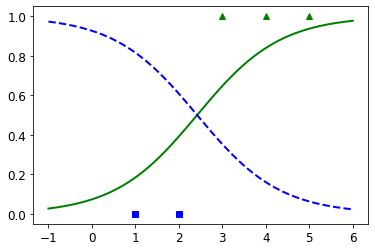

In [12]:
X_new = np.linspace(-1, 6, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X[:2], y[:2], "bs", X[2:], y[2:], "g^")

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="0")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="1")

plt.show()

decision_boundary:  [2.42642643]


/usr/local/lib/python3.7/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


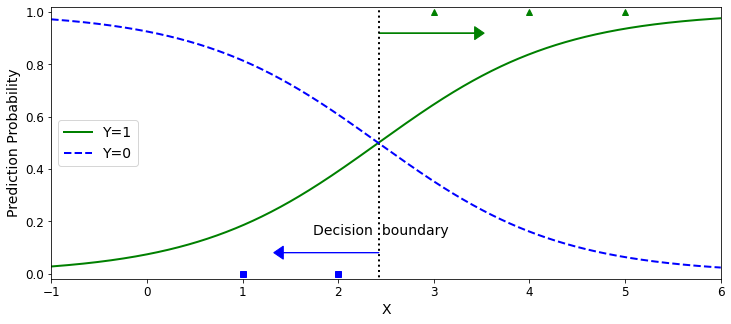

array([0, 1])

In [13]:
X_new = np.linspace(-1, 6, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
print("decision_boundary: ",decision_boundary)
plt.figure(figsize=(12, 5))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Y=1")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Y=0")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -1, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 1, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("X", fontsize=14)
plt.ylabel("Prediction Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([-1, 6, -0.02, 1.02])
plt.show()

log_reg.predict([[2.2], [2.6]])

## Logistic function (Sigmoid function)

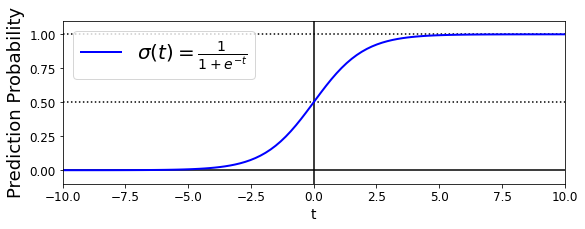

In [14]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.ylabel("Prediction Probability", rotation=90, fontsize=18)
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [15]:
x_new = 2.3
t = log_reg.coef_[0][0]*x_new + log_reg.intercept_[0]
sig = 1 / (1 + np.exp(-t))
print("t: ", t, "sig(t): ", sig)

x_new = 2.5
t = log_reg.coef_[0][0]*x_new + log_reg.intercept_[0]
sig = 1 / (1 + np.exp(-t))
print("t: ", t, "sig(t): ", sig)

t:  -0.1257459200871538 sig(t):  0.46860487748205465
t:  0.08364694342372969 sig(t):  0.5208995514255372


In [16]:
t = 2.5
sig = 1 / (1 + np.exp(-t))
print(sig)

0.9241418199787566


## Cost Function

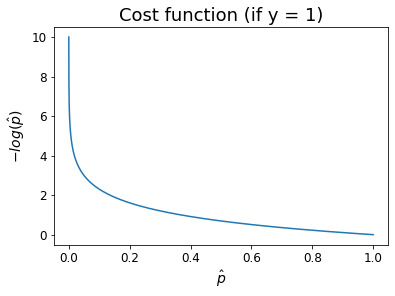

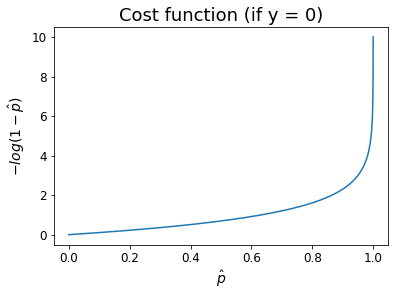

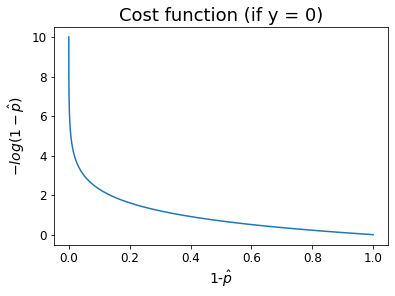

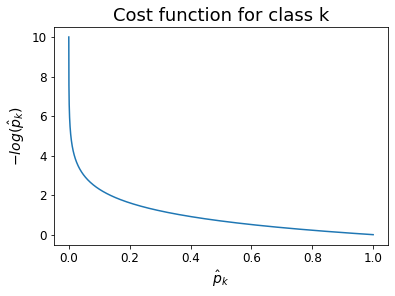

In [17]:
t = np.linspace(-10, 10, 1000)
sig = 1 / (1 + np.exp(-t))

plt.plot(sig, -1*np.log(sig))
plt.xlabel("$\hat{p}$")
plt.ylabel("$-log(\hat{p})$", rotation=90)
plt.title("Cost function (if y = 1)", fontsize=18)
plt.show()

plt.figure()
plt.plot(sig, -1*np.log(1-sig))
plt.xlabel("$\hat{p}$")
plt.ylabel("$-log(1-\hat{p})$", rotation=90)
plt.title("Cost function (if y = 0)", fontsize=18)
plt.show()

plt.figure()
plt.plot(1-sig, -1*np.log(1-sig))
plt.xlabel("1-$\hat{p}$")
plt.ylabel("$-log(1-\hat{p})$", rotation=90)
plt.title("Cost function (if y = 0)", fontsize=18)
plt.show()

plt.figure()
plt.plot(sig, -1*np.log(sig))
plt.xlabel("$\hat{p}_k$")
plt.ylabel("$-log(\hat{p}_k)$", rotation=90)
plt.title("Cost function for class k", fontsize=18)
plt.show()

## Logistic Regression with Sample Dataset 2: 
- X = np.array([[70],[80],[90],[110],[120],[130]])
- y = np.array([[0],[0],[0],[1],[1],[1]])

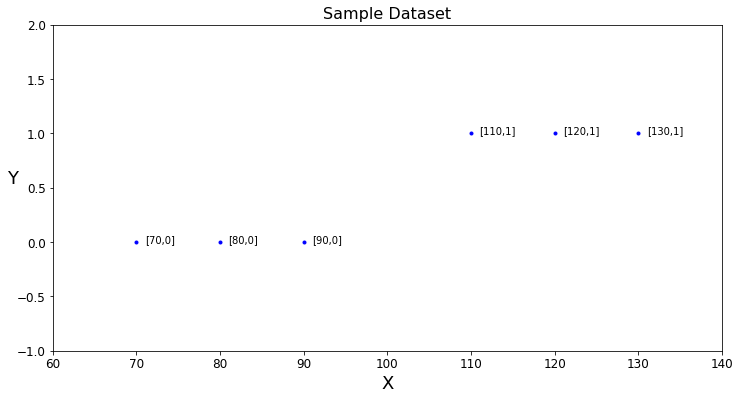

decision_boundary:  [100.04004004]


/usr/local/lib/python3.7/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


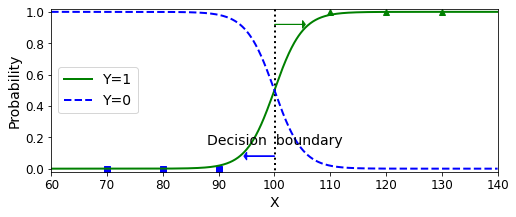

array([0, 1])

In [18]:
X = np.array([[70],[80],[90],[110],[120],[130]])
y = np.array([[0],[0],[0],[1],[1],[1]])
y = y.reshape(-1)

plt.figure(figsize=(12,6))
plt.plot(X, y, "b.")
plt.xlabel("X", fontsize=18)
plt.ylabel("Y", rotation=0, fontsize=18)
plt.axis([60, 140, -1, 2])
plt.title("Sample Dataset", fontsize=16)

plt.text(70+1,0,"[70,0]")
plt.text(80+1,0,"[80,0]")
plt.text(90+1,0,"[90,0]")
plt.text(110+1,1,"[110,1]")
plt.text(120+1,1,"[120,1]")
plt.text(130+1,1,"[130,1]")

plt.show()

from sklearn.linear_model import LogisticRegression
#log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(60, 140, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
print("decision_boundary: ",decision_boundary)

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Y=1")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Y=0")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -5, 0, head_width=0.05, head_length=0.5, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 5, 0, head_width=0.05, head_length=0.5, fc='g', ec='g')
plt.xlabel("X", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([60, 140, -0.02, 1.02])
plt.show()

log_reg.predict([[97], [103]])

In [19]:
x_new = 97
t = log_reg.coef_[0][0]*x_new + log_reg.intercept_[0]
sig = 1 / (1 + np.exp(-t))
print("t: ", t, "sig: ", sig)

x_new = 103
t = log_reg.coef_[0][0]*x_new + log_reg.intercept_[0]
sig = 1 / (1 + np.exp(-t))
print("t: ", t, "sig: ", sig)

t:  -1.183848986216283 sig:  0.23436084415216435
t:  1.1838478549704803 sig:  0.765638952861735


## Softmax regression

Text(0.5, 1.0, 'Sample Dataset')

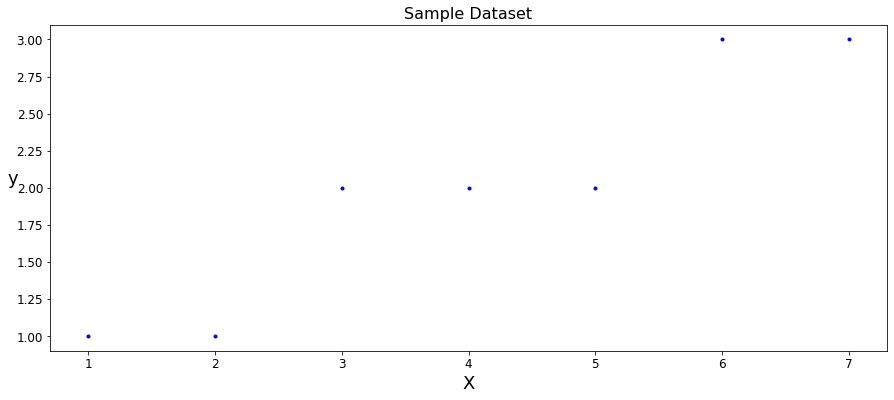

In [20]:
X = np.array([[1],[2],[4],[3],[5],[6],[7]])
y = np.array([[1],[1],[2],[2],[2], [3], [3]])
y = y.reshape(-1)

from sklearn.linear_model import LogisticRegression
#log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg = LogisticRegression(multi_class="multinomial", C=10)
log_reg.fit(X, y)

plt.figure(figsize=(15,6))
plt.plot(X, y, "b.")
plt.xlabel("X", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.title("Sample Dataset", fontsize=16)

decision_boundary1:  [2.50650651]
decision_boundary2:  [5.5015015]


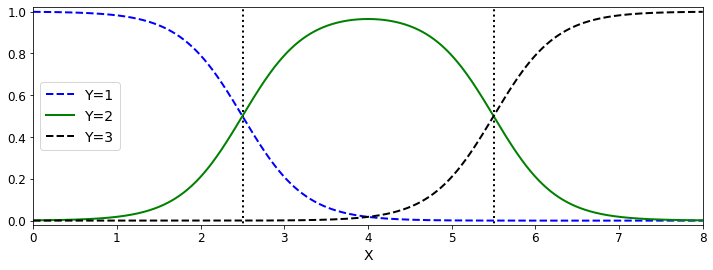

In [21]:
X_new = np.linspace(0, 8, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
print("decision_boundary1: ",decision_boundary)

decision_boundary2 = X_new[y_proba[:, 2] >= 0.5][0]
print("decision_boundary2: ",decision_boundary2)


plt.figure(figsize=(12,4))
# plt.plot(X[y==0], np.zeros(X[y==0].shape), "bs")
# plt.plot(X[y==1], np.zeros(X[y==1].shape), "g^")
# plt.plot(X[y==2], np.zeros(X[y==2].shape), "ko")

# plt.plot(X[y==1], y[y==1], "bs")
# plt.plot(X[y==2], y[y==2], "g^")
# plt.plot(X[y==3], y[y==3], "ko")


plt.plot([decision_boundary, decision_boundary], [-1, 3], "k:", linewidth=2)
plt.plot([decision_boundary2, decision_boundary2], [-1, 3], "k:", linewidth=2)


plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Y=1")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Y=2")
plt.plot(X_new, y_proba[:, 2], "k--", linewidth=2, label="Y=3")

y_predict = log_reg.predict(X_new)
#plt.plot(X_new, y_predict, "b-", linewidth=2, label="$\hat{y}$")

#plt.axis([0, 8, -0.02, 3.02])
plt.axis([0, 8, -0.02, 1.02])

# plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
# plt.arrow(decision_boundary, 0.08, -5, 0, head_width=0.05, head_length=0.5, fc='b', ec='b')
# plt.arrow(decision_boundary, 0.92, 5, 0, head_width=0.05, head_length=0.5, fc='g', ec='g')
plt.xlabel("X", fontsize=14)
plt.legend(loc="center left", fontsize=14)
# plt.axis([60, 140, -0.02, 1.02])
plt.show()

decision_boundary1:  [2.50650651]
decision_boundary2:  [5.5015015]


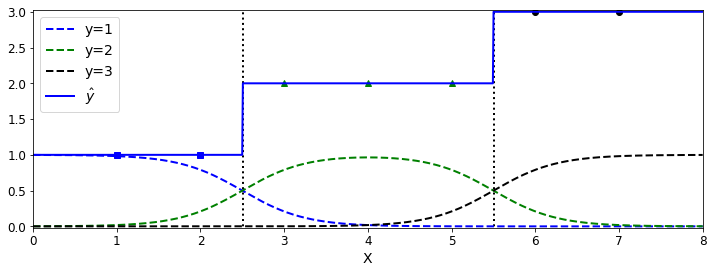

In [22]:
X_new = np.linspace(0, 8, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
print("decision_boundary1: ",decision_boundary)

decision_boundary2 = X_new[y_proba[:, 2] >= 0.5][0]
print("decision_boundary2: ",decision_boundary2)


plt.figure(figsize=(12,4))
#plt.figure(figsize=(8,6))



plt.plot(X[y==1], y[y==1], "bs")
plt.plot(X[y==2], y[y==2], "g^")
plt.plot(X[y==3], y[y==3], "ko")


plt.plot([decision_boundary, decision_boundary], [-1, 3], "k:", linewidth=2)
plt.plot([decision_boundary2, decision_boundary2], [-1, 3], "k:", linewidth=2)


plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="y=1")
plt.plot(X_new, y_proba[:, 1], "g--", linewidth=2, label="y=2")
plt.plot(X_new, y_proba[:, 2], "k--", linewidth=2, label="y=3")

y_predict = log_reg.predict(X_new)
plt.plot(X_new, y_predict, "b-", linewidth=2, label="$\hat{y}$")

plt.axis([0, 8, -0.02, 3.02])

# plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
# plt.arrow(decision_boundary, 0.08, -5, 0, head_width=0.05, head_length=0.5, fc='b', ec='b')
# plt.arrow(decision_boundary, 0.92, 5, 0, head_width=0.05, head_length=0.5, fc='g', ec='g')
plt.xlabel("X", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
# plt.axis([60, 140, -0.02, 1.02])
plt.show()

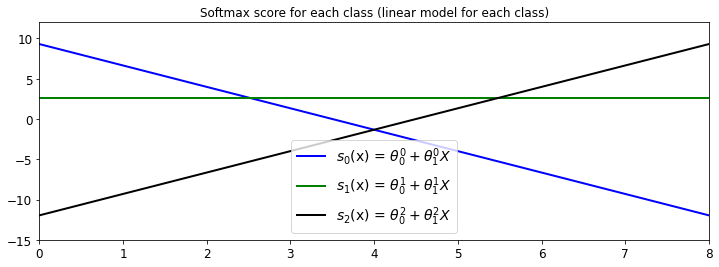

In [23]:
plt.figure(figsize=(12,4))
X_new = np.linspace(0, 8, 1000).reshape(-1, 1)
t_predict = log_reg.coef_[0][0]*X_new + log_reg.intercept_[0]
plt.plot(X_new, t_predict, "b-", linewidth=2, label="$s_{0}$(x) = $\\theta_{0}^0+\\theta_{1}^0 X}$")

t_predict = log_reg.coef_[1][0]*X_new + log_reg.intercept_[1]
plt.plot(X_new, t_predict, "g-", linewidth=2, label="$s_{1}$(x) = $\\theta_{0}^1+\\theta_{1}^1 X}$")

t_predict = log_reg.coef_[2][0]*X_new + log_reg.intercept_[2]
plt.plot(X_new, t_predict, "k-", linewidth=2, label="$s_{2}$(x) = $\\theta_{0}^2+\\theta_{1}^2 X}$")

plt.legend(loc="lower center", fontsize=14)
plt.title("Softmax score for each class (linear model for each class)")
plt.axis([0, 8, -15, 12])
plt.show()

## Exponential Function

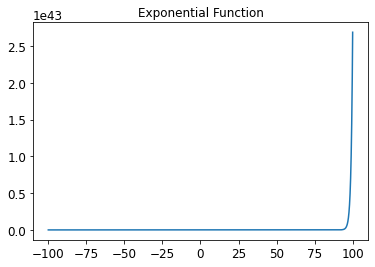

In [24]:
x = np.linspace(-100, 100, 20000)
y = np.exp(x)
plt.plot(x,y)
plt.title("Exponential Function")
plt.show()

## Non-Convex Function

ref: https://scipy-lectures.org/advanced/mathematical_optimization/auto_examples/plot_convex.html

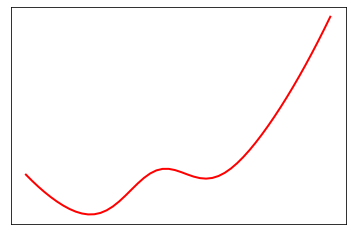

In [25]:
x = np.linspace(-1, 2)
plt.plot(x, x**2 + np.exp(-5*(x - .3)**2) , 'r-', linewidth=2)
plt.xticks([])
plt.yticks([])
plt.show()

## Linear regression using batch gradient descent

In [26]:
X = np.array([[1],[2],[4],[3],[5]])
y = np.array([[1],[3],[3],[2],[5]])

X_b = np.c_[np.ones((5, 1)), X]  # add x0 = 1 to each instance

eta = 0.1
n_iterations = 5000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(theta) 
# The linear model is: y = 0.4 + 0.8*X

[[0.40007017]
 [0.79998056]]


#Assignment (classification)

In [27]:
data = pd.read_csv('moodmsdfeatures.csv')  # load data set

In [28]:
data.head() # Return the first 5 rows

,dzr_sng_id,MSD_sng_id,MSD_track_id,valence,arousal,artist_name,track_name,mode,tempo,loudness,quadrant
0,560270,SOTFUBR12A8C13E3EC,TRAYKVH128F42AC993,0.373325,-0.923151,Faithless,Mass Destruction,1,88.740,-5.509,4
1,560274,SOULDME12AB01887C6,TRATCMK12903CABAC8,0.373325,-0.923151,Faithless,Salva Mea,0,128.067,-9.000,4
2,623060,SOAYOFO12AF72A4B88,TRALJBT128F4266FD8,0.594359,-0.130347,Jennifer Lopez,Play,0,104.796,-1.810,4
3,916339,SOOOWIC12A6701C7E5,TRBGPJP128E078ED20,1.071901,0.846830,Aerosmith,Crazy,0,232.709,-4.430,1
4,916480,SOJCBAM12A6701FD04,TRAGFPP128E078F34C,0.032224,-0.512921,The Cardigans,Paralyzed,1,145.271,-6.966,4


## Univariate Softmax Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

X = data['mode'].values.reshape(-1,1)
y = data['quadrant'].values.reshape(-1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

reg = LogisticRegression(multi_class="multinomial", max_iter = 300)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

score = reg.score(X_train, y_train)
print("Train score: %.4f" % score)
score = reg.score(X_test, y_test)
print("Test score: %.4f" % score)

Train score: 0.3134
Test score: 0.2174


## Multivariate Softmax Regression

In [30]:
from sklearn.linear_model import LogisticRegression

X = data[['mode','tempo','loudness']]
X = preprocessing.normalize(X, norm='l2')
y = data['quadrant'].values.reshape(-1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

reg = LogisticRegression(multi_class="multinomial", max_iter = 100)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

score = reg.score(X_train, y_train)
print("Train score: %.4f" % score)
score = reg.score(X_test, y_test)
print("Test score: %.4f" % score)

Train score: 0.3134
Test score: 0.2174


MSD features

In [31]:
import csv
import hdf5_getters

songreader = csv.DictReader(open('moodmsdfeatures.csv'))

timbre_mean = np.empty((0,12), dtype=float)
timbre_var = np.empty((0,12), dtype=float)
chroma_mean = np.empty((0,12), dtype=float)
chroma_var = np.empty((0,12), dtype=float)
loudmax_mean = np.empty((0,1), dtype=float)
loudmax_var = np.empty((0,1), dtype=float)

for song in songreader:
    trid = song['MSD_track_id']
    filename = 'deezer_MSD/' + trid + '.h5'
    h5 = hdf5_getters.open_h5_file_read(filename)
    print("filename: ",filename)
    timbre = hdf5_getters.get_segments_timbre(h5)
    print("timbre.shape: ",timbre.shape)
    timbre_mean = np.vstack((timbre_mean, np.mean(timbre, axis = 0)))
    print("timbre_mean.shape: ",timbre_mean.shape)
    timbre_var = np.vstack((timbre_var, np.var(timbre, axis = 0)))
    print("timbre_var.shape: ",timbre_var.shape)
    chroma = hdf5_getters.get_segments_pitches(h5)
    chroma_mean = np.vstack((chroma_mean, np.mean(chroma, axis = 0)))
    chroma_var = np.vstack((chroma_var, np.var(chroma, axis = 0)))
    loudmax = hdf5_getters.get_segments_loudness_max(h5)
    loudmax_mean = np.vstack((loudmax_mean, np.mean(loudmax, axis = 0)))
    loudmax_var = np.vstack((loudmax_var, np.var(loudmax, axis = 0)))    

filename:  deezer_MSD/TRAYKVH128F42AC993.h5
timbre.shape:  (966, 12)
timbre_mean.shape:  (1, 12)
timbre_var.shape:  (1, 12)
filename:  deezer_MSD/TRATCMK12903CABAC8.h5
timbre.shape:  (1084, 12)
timbre_mean.shape:  (2, 12)
timbre_var.shape:  (2, 12)
filename:  deezer_MSD/TRALJBT128F4266FD8.h5
timbre.shape:  (1077, 12)
timbre_mean.shape:  (3, 12)
timbre_var.shape:  (3, 12)
filename:  deezer_MSD/TRBGPJP128E078ED20.h5
timbre.shape:  (843, 12)
timbre_mean.shape:  (4, 12)
timbre_var.shape:  (4, 12)
filename:  deezer_MSD/TRAGFPP128E078F34C.h5
timbre.shape:  (927, 12)
timbre_mean.shape:  (5, 12)
timbre_var.shape:  (5, 12)
filename:  deezer_MSD/TRAXLPR128F428E466.h5
timbre.shape:  (732, 12)
timbre_mean.shape:  (6, 12)
timbre_var.shape:  (6, 12)
filename:  deezer_MSD/TRBBAHD128F428E0FE.h5
timbre.shape:  (900, 12)
timbre_mean.shape:  (7, 12)
timbre_var.shape:  (7, 12)
filename:  deezer_MSD/TRBHLDQ128F423EF10.h5
timbre.shape:  (559, 12)
timbre_mean.shape:  (8, 12)
timbre_var.shape:  (8, 12)
filena

In [32]:
from sklearn import preprocessing
X = np.hstack((timbre_mean,timbre_var,chroma_mean,chroma_var, loudmax_mean, loudmax_var))
y = data['quadrant'].values.reshape(-1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

reg = LogisticRegression(multi_class="multinomial", max_iter = 100)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

score = reg.score(X_train, y_train)
print("Train score: %.4f" % score)
score = reg.score(X_test, y_test)
print("Test score: %.4f" % score)

Train score: 0.4677
Test score: 0.4783


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


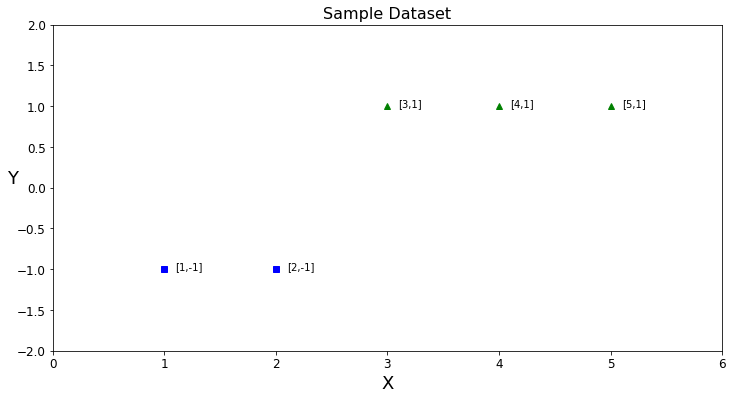

In [33]:

X = np.array([[1],[2],[4],[3],[5]])
y = np.array([[-1],[-1],[1],[1],[1]])
y = y.reshape(-1)

plt.figure(figsize=(12,6))
plt.plot(X[:2], y[:2], "bs", X[2:], y[2:], "g^")
plt.xlabel("X", fontsize=18)
plt.ylabel("Y", rotation=0, fontsize=18)
plt.axis([0, 6, -2, 2])
plt.title("Sample Dataset", fontsize=16)

plt.text(1+0.1,-1,"[1,-1]")
plt.text(2+0.1,-1,"[2,-1]")
plt.text(3+0.1,1,"[3,1]")
plt.text(4+0.1,1,"[4,1]")
plt.text(5+0.1,1,"[5,1]")

plt.show()

The linear model is: y = -1.6 + 0.6*X


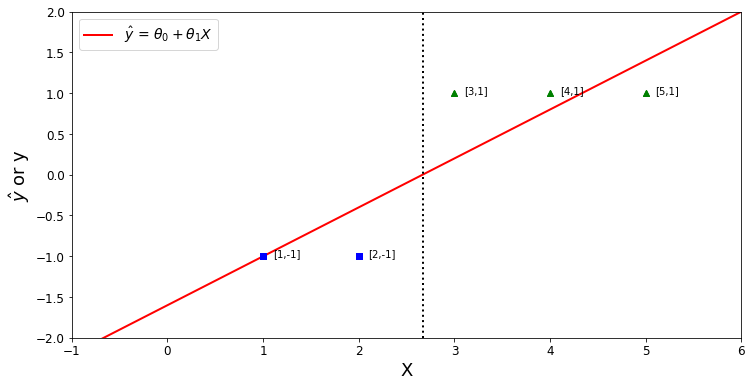

In [34]:

X = np.array([[1],[2],[4],[3],[5]])
y = np.array([[-1],[-1],[1],[1],[1]])

plt.figure(figsize=(12,6))
plt.plot(X[:2], y[:2], "bs", X[2:], y[2:], "g^")
plt.xlabel("X", fontsize=18)
plt.ylabel("Y", rotation=0, fontsize=18)
plt.axis([0, 6, -2, 2])

plt.text(1+0.1,-1,"[1,-1]")
plt.text(2+0.1,-1,"[2,-1]")
plt.text(3+0.1,1,"[3,1]")
plt.text(4+0.1,1,"[4,1]")
plt.text(5+0.1,1,"[5,1]")

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("The linear model is: y = {:.5} + {:.5}*X".format(lin_reg.intercept_[0], lin_reg.coef_[0][0]))

X_new = np.array([[-1], [6]])
y_predict = lin_reg.predict(X_new)
plt.plot(X_new, y_predict, "r-", linewidth=2, label="$\hat{y}$ = $\\theta_{0}+\\theta_{1} X}$")
plt.plot(X[:2], y[:2], "bs", X[2:], y[2:], "g^")
plt.xlabel("X", fontsize=18)
plt.ylabel("$\hat{y}$ or y", rotation=90, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-1, 6, -2, 2])
decision_boundary = 1.6/0.6
plt.plot([decision_boundary, decision_boundary], [-2, 2], "k:", linewidth=2)

plt.show()

In [35]:
1.6/0.6


2.666666666666667